# Visualisering af DMI Vejrdata i en GUI

## Formål

Du skal hente aktuelle eller historiske vejrdata fra DMI’s API, indlæse dem i en pandas DataFrame, og præsentere resultaterne i en PySide6-applikation. Applikationen skal bruge Matplotlib som backend til at vise grafer eller bruge plotly til en interaktivt dashboard.

## Trin 1: Hent data fra DMI API

- DMI stiller åbne data til rådighed via DMI’s [Open Data](https://opendatadocs.dmi.govcloud.dk/en/Getting_Started) API.
- For at få adgang, skal man oprette en konto og generere en gratis API-nøgle på [DMI API Portal](https://opendatadocs.dmi.govcloud.dk/en/Authentication)
- Lav et Python-script, der henter data (JSON-format) og gemmer det i en pandas DataFrame. [Her](https://opendatadocs.dmi.govcloud.dk/en/APIs/Meteorological_Observation_API) finder du eksempler for **Meteorological Observation API**
    - Tip: brug [**requests**](https://pypi.org/project/requests/) til at hente data.
    - Husk at konvertere tidspunkter til **datetime**.

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta, timezone
url = "https://dmigw.govcloud.dk/v2/metObs/collections/observation/items"

hours = 24
now = datetime.now(timezone.utc)
start = now - timedelta(hours=hours)
datetime_range = f"{start.isoformat()}/{now.isoformat()}"
params = {
    "api-key": "75ab0b53-550a-4ede-b9ae-d1d9bc108f48",   # <- indsæt din egen nøgle
    "stationId": "06081",       # station fx København
    "parameterId": "temp_dry",  # parameter fx temperatur
    "datetime": datetime_range,
    "limit": 1000
}



response = requests.get(url, params=params).json()
df = pd.json_normalize(response['features'])
print(df['geometry.coordinates'])
print(df['properties.value'])
df.head()
#print(response)
#print(df)

0      [8.0828, 55.5575]
1      [8.0828, 55.5575]
2      [8.0828, 55.5575]
3      [8.0828, 55.5575]
4      [8.0828, 55.5575]
             ...        
138    [8.0828, 55.5575]
139    [8.0828, 55.5575]
140    [8.0828, 55.5575]
141    [8.0828, 55.5575]
142    [8.0828, 55.5575]
Name: geometry.coordinates, Length: 143, dtype: object
0      6.2
1      6.4
2      6.5
3      6.6
4      6.6
      ... 
138    9.2
139    9.3
140    9.3
141    9.3
142    9.4
Name: properties.value, Length: 143, dtype: float64


,type,id,geometry.type,geometry.coordinates,properties.parameterId,properties.created,properties.value,properties.observed,properties.stationId
0,Feature,b78cec3b-57cf-b27d-86d0-4d1351ab09a7,Point,"[8.0828, 55.5575]",temp_dry,2025-12-12T13:40:51.474946Z,6.2,2025-12-12T13:40:00Z,06081
1,Feature,41b2377f-73e6-fb69-5757-bbef54070264,Point,"[8.0828, 55.5575]",temp_dry,2025-12-12T13:30:51.093593Z,6.4,2025-12-12T13:30:00Z,06081
2,Feature,03f1ad63-7dd6-de4b-93ee-09ee76c46233,Point,"[8.0828, 55.5575]",temp_dry,2025-12-12T13:20:51.280454Z,6.5,2025-12-12T13:20:00Z,06081
3,Feature,9e7f052e-8b3f-7c84-ac7d-528c8b288b12,Point,"[8.0828, 55.5575]",temp_dry,2025-12-12T13:10:46.872948Z,6.6,2025-12-12T13:10:00Z,06081
4,Feature,6ee950ae-513c-a188-ad7f-f16ac058b5e4,Point,"[8.0828, 55.5575]",temp_dry,2025-12-12T13:01:04.589034Z,6.6,2025-12-12T13:00:00Z,06081


In [2]:
to_drop =[
'geometry.type',
'id',
    'properties.parameterId',
    'properties.created',
    'geometry.coordinates',
    'properties.stationId',
    'type'
]

df_data = df.drop(to_drop, inplace=False, axis=1)

In [3]:
df_data.head(100)

,properties.value,properties.observed
0,6.2,2025-12-12T13:40:00Z
1,6.4,2025-12-12T13:30:00Z
2,6.5,2025-12-12T13:20:00Z
3,6.6,2025-12-12T13:10:00Z
4,6.6,2025-12-12T13:00:00Z
...,...,...
95,8.8,2025-12-11T21:50:00Z
96,8.9,2025-12-11T21:40:00Z
97,8.9,2025-12-11T21:30:00Z
98,8.9,2025-12-11T21:20:00Z


## Trin 2: Vælg et datasæt (fx temperatur over de seneste dage).

Udregn fx:

- gennemsnitstemperatur pr. dag
- højeste og laveste temperatur

In [4]:
import numpy as np

print(np.max(df_data['properties.value']))
print(np.min(df_data['properties.value']))
print(np.average(df_data['properties.value']))


9.4
6.2
8.632867132867133


## Trin 3: Lav en PySide6 GUI med Matplotlib

Byg en simpel GUI med PySide6. GUI’en skal have:
 
- En knap til at hente/loade data fra DMI.
- En figur (Matplotlib-plot) til at vise data.


['13:40', '13:30', '13:20', '13:10', '13:00', '12:50', '12:40', '12:30', '12:20', '12:10', '12:00', '11:50', '11:40', '11:30', '11:20', '11:10', '11:00', '10:50', '10:40', '10:30', '10:20', '10:10', '10:00', '09:50', '09:40', '09:30', '09:20', '09:10', '09:00', '08:50', '08:40', '08:30', '08:20', '08:10', '08:00', '07:50', '07:40', '07:30', '07:20', '07:10', '07:00', '06:50', '06:40', '06:30', '06:20', '06:10', '06:00', '05:50', '05:40', '05:30', '05:20', '05:10', '05:00', '04:50', '04:40', '04:30', '04:20', '04:10', '04:00', '03:50', '03:40', '03:30', '03:20', '03:10', '03:00', '02:50', '02:40', '02:30', '02:20', '02:10', '02:00', '01:50', '01:40', '01:30', '01:20', '01:10', '01:00', '00:50', '00:40', '00:30', '00:20', '00:10', '00:00', '23:50', '23:40', '23:30', '23:20', '23:10', '23:00', '22:50', '22:40', '22:30', '22:20', '22:10', '22:00', '21:50', '21:40', '21:30', '21:20', '21:10', '21:00', '20:50', '20:40', '20:30', '20:20', '20:10', '20:00', '19:50', '19:40', '19:30', '19:20', 

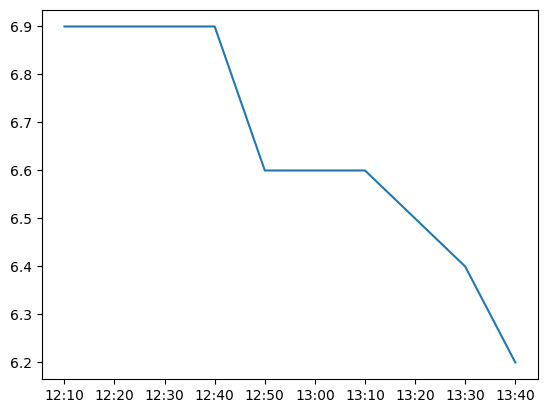

In [23]:
import matplotlib.pyplot as plt

y = list(df_data['properties.value'].head(10))

x = []

z = []

for i in df_data['properties.observed']:
    x = i[11:]
    z.append(x[:5])
    


print(z)

times = []

for j in range(10):
    times.append(z[j])
times.reverse()
y.reverse()

#df_data2 = pd.to_datetime(df_data['properties.observed'])
df_data2 = df_data.style.format({'properties.observed': '{:%T}'})
print(df_data2)
#x = df_data2

fig, ax = plt.subplots()
ax.plot(times, y)

#ax.grid(True, linestyle='-.')
#ax.tick_params(labelcolor='r', labelsize='small', width=3)

#print(df_data)
#print(df_data2)
#df_data.plot()
#plt.bar(x,y)
plt.show()


## Ekstra udfordringer:
- Brug en DateTimePicker i PySide6, så man kan vælge tidsperiode.
- En dropdown-menu, hvor man kan vælge parameter (fx temperatur, nedbør).
- Tilføj mulighed for at vælge forskellige stationer (fx København, Aalborg).
- Lav et interaktivt `plotly.express` line plot af temperatur over tid.